Project  Statistical NLP
 
We welcome you all to this NLP based case study. The case study covers concepts taught in traditional models in the NLP course. 

Project Description  
Classification is probably the most popular task that you would deal with in real life.  Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the  information about the writer without knowing about him/her.We are going to create a classifier that predicts multiple features of the author of a given text.We have designed it as a Multilabel classification problem. 

Dataset 

Blog Authorship Corpus  Over 600,000 posts from more than 19 thousand bloggers    The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from  blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million  words - or approximately 35 posts and 7250 words per person.    Each blog is presented as a separate file, the name of which indicates a blogger id# and the  blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and  age but for many, industry and/or sign is marked as unknown.)  

All bloggers included in the corpus fall into one of three age groups:  

8240 "10s" blogs (ages 13-17), 
8086 "20s" blogs(ages 23-27) 
2994 "30s" blogs (ages 33-47)
 
For each age group, there is an equal number of male and female bloggers.  Each blog in the corpus includes at least 200 occurrences of common English words. All formatting  has been stripped with two exceptions. Individual posts within a single blogger are separated by the  date of the following post and links within a post are denoted by the label urllink. 

Approach & Steps  

1. Load the dataset

a. Tip: As the dataset is large, use fewer rows. Check what is working well on your  machine and decide accordingly.

2. Preprocess rows of the “text” column

a. Remove unwanted characters  b. Convert text to lowercase  c. Remove unwanted spaces  d. Remove stopwords 

3. As we want to make this into a multi-label classification problem, you are required to merge  all the label columns together, so that we have all the labels together for a particular sentence

a. Label columns to merge: “gender”, “age”, “topic”, “sign”  b. After completing the previous step, there should be only two columns in your data  frame i.e. “text” and “labels” as shown in the below image

4. Separate features and labels, and split the data into training and testing 

5. Vectorize the features

a. Create a Bag of Words using count vectorizer  i. Use ngram_range=(1, 2)ii. Vectorize training and testing features  b. Print the term-document matrix 
 
6. Create a dictionary to get the count of every label i.e. the key will be label name and value will  be the total count of the label. Check below image for reference
 
7. Transform the labels 

As we have noticed before, in this task each example can have multiple tags. To deal with  such kind of prediction, we need to transform labels in a binary form and the prediction will be  a mask of 0s and 1s. For this purpose, it is convenient to use ​MultiLabelBinarizer​ from sklearn  a. Convert your train and test labels using MultiLabelBinarizer 

8. Choose a classifier

In this task, we suggest using the One-vs-Rest approach, which is implemented in  OneVsRestClassifier​ class. In this approach k classifiers (= number of tags) are trained. As a  basic classifier, use ​LogisticRegression​. It is one of the simplest methods, but often it  performs good enough in text classification tasks. It might take some time because the  number of classifiers to train is large.  a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on  every label  b. As One-vs-Rest approach might not have been discussed in the sessions, we are  providing you the code for that
 
9. Fit the classifier, make predictions and get the accuracy 

a. Print the following  i. Accuracy score  ii. F1 score  iii. Average precision score  iv. Average recall score  v. Tip: Make sure you are familiar with all of them. How would you expect the  things to work for the multi-label scenario? Read about micro/macro/weighted  averaging 

In [405]:
import pandas as pd
import numpy as np
import scipy as sp
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
%matplotlib inline
import nltk
from nltk.corpus import stopwords 
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [406]:
blog_df=pd.read_csv('blogtext.csv')

## reading the dataset

In [407]:
blog_df=blog_df.iloc[0:20000]

## subsetting the dataset, considering that the size of dataset is large, execution is taking time if more rows are included
## specially at the stage of model building, training, testing and execution 

In [408]:
blog_df.shape

## checking the shape of the dataset

(20000, 7)

In [409]:
blog_df.head()

## reading first 5 rows of the dataset

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [410]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
id        20000 non-null int64
gender    20000 non-null object
age       20000 non-null int64
topic     20000 non-null object
sign      20000 non-null object
date      20000 non-null object
text      20000 non-null object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [411]:
blog_df['age']=blog_df['age'].astype('str')

## converting age into str type

In [412]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
id        20000 non-null int64
gender    20000 non-null object
age       20000 non-null object
topic     20000 non-null object
sign      20000 non-null object
date      20000 non-null object
text      20000 non-null object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [413]:
blog_df.isna().sum()

## there is no nil data in the dataset

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [414]:
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [415]:
# function for text cleaning 

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [416]:
blog_df['clean_text']=blog_df['text'].apply(lambda x: clean_text(x))

In [417]:
blog_df.head()

## after applying above steps for cleaning, below output can be seen which is free from special characters, spaces removed 
## and all text can be seen in lower case 

,id,gender,age,topic,sign,date,text,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,these are the team members drewes van der laag...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...


In [418]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

blog_df['clean_text'] = blog_df['clean_text'].apply(lambda x: remove_stopwords(x))

In [419]:
blog_df.head()

## dataset without stop words 

,id,gender,age,topic,sign,date,text,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...


In [420]:
blog_df['labels']=' '

In [421]:
for w in range(0,blog_df.shape[0]):
    blog_label=[]
    blog_label.append(blog_df['gender'][w])
    blog_label.append(blog_df['age'][w])
    blog_label.append(blog_df['topic'][w])
    blog_label.append(blog_df['sign'][w])
    blog_df['labels'][w]=blog_label
    
    ## merging label columns gender, age, topic, sign since we will make this into multi label classification problem 
    ## merging will ensure that there are all labels together for a particular sentence 

In [422]:
blog_df.head()

,id,gender,age,topic,sign,date,text,clean_text,labels
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [423]:
blog_df['id'].nunique()

530

In [424]:
#blog_df['text']=blog_df['text'].str.lower()

## for converting the text column into lower case 

In [425]:
#blog_df['text']=blog_df['text'].str.strip()

## this is for removing extra spaces

In [426]:
#blog_df['text']=blog_df['text'].apply(lambda x : re.sub('[@,.,^,$,*,?,\,/,\n,\t,<,>,&,+,-,!,:,;,(,),-]','',x))

In [427]:
blog_df.sample(20)

## after merging columns gender age topic sign, below is the labels column created. In subsequent step we will remove all
## columns and retain only clean text and labels as per requirement to solve the problem statement 

,id,gender,age,topic,sign,date,text,clean_text,labels
2119,589736,male,35,Technology,Aries,"05,August,2004","What ees thees -- how you say? ah, ...",ees thees say ah yes karl maggie show,"[male, 35, Technology, Aries]"
16344,1915813,male,27,indUnk,Sagittarius,"29,May,2004",If YOU believe in Evolution ins...,believe evolution instead jesus youll end hell...,"[male, 27, indUnk, Sagittarius]"
517,3022585,female,27,Education,Aquarius,"01,August,2004",Of course I've thought about it happeni...,course ive thought happening ive envisioned wo...,"[female, 27, Education, Aquarius]"
1803,589736,male,35,Technology,Aries,"05,August,2004",How about Pink or the Phoenix in Ca...,pink phoenix carytown chop suey books,"[male, 35, Technology, Aries]"
2465,589736,male,35,Technology,Aries,"05,August,2004",Sounds like someone is finding heal...,sounds like someone finding healing arms dream...,"[male, 35, Technology, Aries]"
580,3176655,male,24,Engineering,Libra,"03,July,2004",If you could live anywhere in...,could live anywhere world would id live mike g...,"[male, 24, Engineering, Libra]"
8333,3869393,female,25,Technology,Sagittarius,"16,July,2004",Today was a serious case of nostalgia.&...,today serious case nostalgia nbsp kept bet bos...,"[female, 25, Technology, Sagittarius]"
13103,669514,female,27,indUnk,Sagittarius,"01,June,2004",I'm back from my busy weekend! =) Sat...,im back busy weekend saturday saturday morning...,"[female, 27, indUnk, Sagittarius]"
9192,2581876,female,24,indUnk,Sagittarius,"18,July,2004",don't be afraid: i'll only me...,dont afraid ill meet alley carrying nbsp knife...,"[female, 24, indUnk, Sagittarius]"
11024,2061087,female,33,indUnk,Cancer,"28,January,2004",Laundromats suck. Big time. That is a...,laundromats suck big time,"[female, 33, indUnk, Cancer]"


In [428]:
blog_df=blog_df.drop(['id','gender','age','topic','sign','date','text'],axis=1)

## dropping all columns and retaining clean_text and labels column

In [429]:
blog_df.head()

,clean_text,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [430]:
blog_df['labels'].values

array([list(['male', '15', 'Student', 'Leo']),
       list(['male', '15', 'Student', 'Leo']),
       list(['male', '15', 'Student', 'Leo']), ...,
       list(['male', '16', 'Student', 'Pisces']),
       list(['male', '16', 'Student', 'Pisces']),
       list(['male', '16', 'Student', 'Pisces'])], dtype=object)

The underlying concept is apparent in the name – multi-label classification. Here, an instance/record can have multiple labels and the number of labels per instance is not fixed.

An example for the concept is noted below. Take a look at the below tables, where ‘X’ represents the input variables and ‘y’ represents the target variables (which we are predicting):

multi-label classification

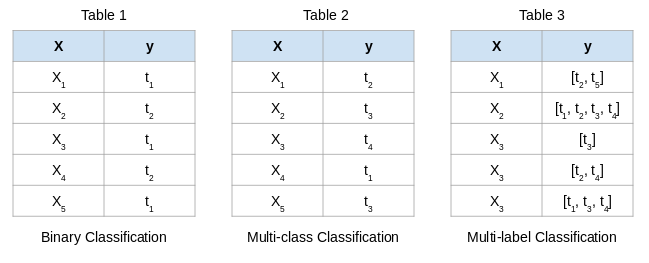

‘y’ is a binary target variable in Table 1. Hence, there are only two labels – t1 and t2
‘y’ contains more than two labels in Table 2. But, notice how there is only one label for every input in both these tables
Table 3 stands out. There are multiple tags here, not just across the table, but for individual inputs as well.Traditional classification algorithms directly cannot be applied on this kind of dataset. The reason is, because these algorithms expect a single label for every input, when instead there are multiple labels in Table 3, so we will be using multi-label classification 

Supervised classification algorithms directly cannot be used on a multi-label dataset. Therefore, we’ll first have to transform our target variable

multilabel data

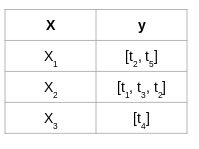


In [431]:
X = blog_df.clean_text
y = blog_df.labels

## dividing the features and labels into X and Y and split is done into train and test 

In [432]:
# split dataset into training and test set before creating dtm using count vectorizer 

X_train, X_test, y_train, y_test = train_test_split(blog_df['clean_text'], y, test_size=0.3, random_state=7)

In [433]:
multilabel_binarizer = MultiLabelBinarizer()
y_train_mlb=multilabel_binarizer.fit_transform(y_train)
y_test_mlb=multilabel_binarizer.transform(y_test)

In [434]:
print(X_train.shape)
print(X_test.shape)
print(y_train_mlb.shape)
print(y_test_mlb.shape)

## Valid representation of multilabel y is either dense (or sparse) binary matrix of shape (n_samples, n_classes). 
## Each column represents a class. 
## The 1’s in each row denote the positive classes a sample has been labelled with

(14000,)
(6000,)
(14000, 75)
(6000, 75)


In [435]:
multilabel_binarizer.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45',
       '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Communications-Media', 'Construction', 'Consulting', 'Education',
       'Engineering', 'Fashion', 'Gemini', 'Government', 'HumanResources',
       'Internet', 'InvestmentBanking', 'Law', 'LawEnforcement-Security',
       'Leo', 'Libra', 'Manufacturing', 'Marketing', 'Military',
       'Museums-Libraries', 'Non-Profit', 'Pisces', 'Publishing',
       'RealEstate', 'Religion', 'Sagittarius', 'Science', 'Scorpio',
       'Sports-Recreation', 'Student', 'Taurus', 'Technology',
       'Telecommunications', 'Transportation', 'Virgo', 'female',
       'indUnk', 'male'], dtype=object)

In multi-label classification, a misclassification is no longer a hard wrong or right. A prediction containing a subset of the actual classes should be considered better than a prediction that contains none of them, i.e., predicting two of the three labels correctly this is better than predicting no labels at all

In [436]:
# instantiate the vectorizer
# creating bag of words which include 1-grams and 2-gram
vect = CountVectorizer(ngram_range=(1, 2))

In [437]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [438]:
# examine & print the document-term matrix
X_train_dtm

<14000x983392 sparse matrix of type '<class 'numpy.int64'>'
	with 2362500 stored elements in Compressed Sparse Row format>

In [439]:
print(X_train_dtm)

  (0, 22297)	3
  (0, 22817)	1
  (0, 23669)	1
  (0, 23992)	1
  (0, 23993)	1
  (0, 47371)	1
  (0, 47817)	1
  (0, 58487)	1
  (0, 59851)	1
  (0, 77773)	1
  (0, 78146)	1
  (0, 78903)	1
  (0, 79032)	1
  (0, 86142)	1
  (0, 86226)	1
  (0, 88589)	1
  (0, 88613)	1
  (0, 88848)	1
  (0, 88894)	1
  (0, 96121)	1
  (0, 96192)	1
  (0, 117663)	2
  (0, 117672)	2
  (0, 118591)	1
  (0, 118651)	1
  :	:
  (13999, 852755)	1
  (13999, 852965)	1
  (13999, 855521)	2
  (13999, 855535)	1
  (13999, 856632)	1
  (13999, 872420)	1
  (13999, 873115)	1
  (13999, 896192)	1
  (13999, 896362)	1
  (13999, 909850)	1
  (13999, 911275)	1
  (13999, 913568)	1
  (13999, 913571)	1
  (13999, 914232)	1
  (13999, 914422)	1
  (13999, 927645)	1
  (13999, 928012)	1
  (13999, 928898)	2
  (13999, 928973)	1
  (13999, 929143)	1
  (13999, 929660)	1
  (13999, 929916)	1
  (13999, 934608)	2
  (13999, 935198)	1
  (13999, 936160)	1


In [440]:
X_test_dtm = vect.transform(X_test)

In [441]:
# examine & print the document-term matrix
X_test_dtm

<6000x983392 sparse matrix of type '<class 'numpy.int64'>'
	with 667981 stored elements in Compressed Sparse Row format>

In [442]:
print(X_test_dtm)

  (0, 15586)	1
  (0, 15633)	1
  (0, 22140)	2
  (0, 31830)	1
  (0, 31869)	1
  (0, 39619)	1
  (0, 43154)	1
  (0, 52583)	1
  (0, 84500)	9
  (0, 84663)	1
  (0, 134670)	1
  (0, 151775)	9
  (0, 151883)	9
  (0, 193458)	1
  (0, 193484)	1
  (0, 224152)	1
  (0, 226736)	2
  (0, 227590)	2
  (0, 254027)	1
  (0, 264349)	1
  (0, 283506)	1
  (0, 331344)	1
  (0, 333175)	1
  (0, 336596)	1
  (0, 336878)	1
  :	:
  (5998, 858194)	1
  (5998, 858592)	1
  (5998, 861453)	2
  (5998, 861523)	1
  (5998, 861834)	1
  (5998, 864226)	1
  (5998, 880060)	1
  (5998, 880073)	1
  (5998, 897163)	1
  (5998, 904406)	1
  (5998, 927645)	2
  (5998, 927909)	1
  (5998, 928293)	1
  (5998, 942128)	1
  (5998, 942839)	1
  (5998, 952029)	1
  (5998, 952460)	1
  (5998, 952550)	1
  (5998, 953188)	1
  (5998, 975950)	1
  (5998, 976418)	1
  (5998, 976952)	1
  (5998, 977009)	1
  (5999, 18701)	1
  (5999, 166255)	1


In [443]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(14000, 983392)
(6000, 983392)


In [444]:
blog_df['labels'].to_dict()

{0: ['male', '15', 'Student', 'Leo'],
 1: ['male', '15', 'Student', 'Leo'],
 2: ['male', '15', 'Student', 'Leo'],
 3: ['male', '15', 'Student', 'Leo'],
 4: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 5: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 6: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 7: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 8: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 9: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 10: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 11: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 12: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 13: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 14: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 15: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 16: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 17: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 18: ['male', '33', 'InvestmentBanking', 'Aquarius'],
 19: ['male', '33', 'InvestmentBanking', 'Aq

In [445]:
gender=[]
age=[]
topic=[]
sign=[]


In [446]:
for pattern in blog_df['labels']:
    w=0
    for value in pattern:
        if w==0:
            gender.append(value)
        elif w==1:
            age.append(value)
        elif w==2:
            topic.append(value)
        elif w==3:
            sign.append(value)
        w+=1

In [447]:
age_freq=Counter(age)
gender_freq=Counter(gender)
topic_freq=Counter(topic)
sign_freq=Counter(sign)

In [448]:
def dict_print (age,gender,topic,sign ):
    w = age.copy()   
    w.update(gender)    
    w.update(topic)
    w.update(sign)
    return w

In [449]:
dict_print(age_freq,gender_freq,topic_freq,sign_freq)

Counter({'15': 1097,
         '33': 769,
         '14': 811,
         '25': 1190,
         '17': 1961,
         '23': 1963,
         '37': 130,
         '26': 919,
         '24': 1557,
         '27': 2320,
         '45': 72,
         '34': 871,
         '41': 82,
         '44': 9,
         '16': 1236,
         '39': 105,
         '35': 2494,
         '36': 1726,
         '46': 188,
         '42': 47,
         '13': 113,
         '38': 85,
         '43': 6,
         '40': 1,
         '47': 8,
         '48': 240,
         'male': 11354,
         'female': 8646,
         'Student': 2637,
         'InvestmentBanking': 71,
         'indUnk': 7789,
         'Non-Profit': 204,
         'Banking': 89,
         'Education': 759,
         'Engineering': 357,
         'Science': 87,
         'Communications-Media': 414,
         'BusinessServices': 184,
         'Sports-Recreation': 120,
         'Arts': 358,
         'Internet': 778,
         'Museums-Libraries': 67,
         'Accounting': 35,
 

In [450]:
clf=LogisticRegression(solver='lbfgs')
clf=OneVsRestClassifier(clf)

## using logistic regression and OVR to train the model and make predictions 

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

In [451]:
clf.fit(X_train_dtm,y_train_mlb)

## fit model on train data 

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [452]:

## make predictions on test set

y_pred_test=clf.predict(X_test_dtm)

In [453]:
y_pred_test

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [490]:
## evaluating model performance via accuracy score

accuracy_score(y_test_mlb, y_pred_test)

0.15116666666666667

In [457]:
## evaluating performance of the model using f1 score 

f1_score(y_test_mlb, y_pred_test,average='micro')

0.5216095380029806

In [458]:
## evaluating performance of the model using recall_score

recall_score(y_test_mlb,y_pred_test,average='micro')

0.40105837743239303

In [459]:
## evaluating performance of the model using precision_score

precision_score(y_test_mlb,y_pred_test,average='micro')

0.7457771579110491

In micro-averaging all TPs, TNs, FPs and FNs for each class are summed up and then the average is taken

Micro-Averaging

In micro-averaging method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them. And the micro-average F1-Score will be simply the harmonic mean 

Macro-averaging is straight forward. We just take the average of the precision and recall of the system on different sets

Macro-Averaging

Macro-averaging method can be used when you want to know how the system performs overall across the sets of data. You should not come up with any specific decision with this average. On the other hand, micro-averaging can be a useful measure when your dataset varies in size

In [476]:
multilabel_binarizer.inverse_transform(y_pred_test)[0:5]

## printing true and predicted label for any five examples

[('15', 'Virgo', 'female', 'indUnk'),
 ('35', 'Aries', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('23', 'Internet', 'Leo', 'male'),
 ('male',)]

In [477]:
y_test[0:5]

## printing true and predicted label for any five examples

14356    [female, 23, Education, Aries]
3439      [male, 35, Technology, Aries]
12153       [female, 24, indUnk, Aries]
15029         [male, 23, Internet, Leo]
18549       [female, 14, indUnk, Libra]
Name: labels, dtype: object

In [478]:
# predict probabilities
## These predictions were made based on a default threshold value of 0.5, 
## which means that the probabilities greater than or equal to 0.5 were converted to 1’s and the rest to 0’

y_pred_prob_test = clf.predict_proba(X_test_dtm)

In [479]:
y_pred_prob_test

## Probability estimates :
## The returned estimates for all classes are ordered by label of classes
## Note that in the multilabel case, each sample can have any number of labels
## This returns the marginal probability that the given sample has the label in question

array([[4.15321512e-03, 2.19406613e-05, 9.99956619e-01, ...,
        9.99828072e-01, 9.99932140e-01, 1.71928379e-04],
       [9.50931194e-04, 2.45371750e-03, 1.56856218e-02, ...,
        1.48254991e-01, 1.04038368e-01, 8.51745009e-01],
       [9.23113162e-06, 6.47026917e-06, 9.16869868e-06, ...,
        9.99985764e-01, 9.99999442e-01, 1.42355500e-05],
       ...,
       [1.50685569e-03, 9.80158492e-03, 2.20674426e-02, ...,
        1.22568662e-01, 1.06369768e-01, 8.77431338e-01],
       [4.96229994e-04, 2.33520820e-03, 7.72637902e-01, ...,
        9.90345189e-01, 9.55717829e-01, 9.65481124e-03],
       [1.30617785e-03, 1.97296552e-02, 2.07468449e-02, ...,
        1.86270878e-01, 1.72575694e-01, 8.13729122e-01]])

In [480]:
t = 0.3 # threshold value set to .30 , tried on other probabilities of <.5 which are not giving as good results as with
## probability of .3

y_pred_new_test = (y_pred_prob_test >= t).astype(int)

In [481]:
y_pred_new_test

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [482]:
## evaluating model performance via accuracy score with new threshold limit of .3

accuracy_score(y_test_mlb, y_pred_new_test)

0.19266666666666668

In [483]:
# evaluate performance with new threhold limit of .3 that has been set

f1_score(y_test_mlb, y_pred_new_test, average="micro")

0.5721180005204514

In [484]:
## evaluating performance of the model using recall_score with new threshold limit of .3

recall_score(y_test_mlb,y_pred_new_test,average='micro')

0.503854327263636

In [485]:
## evaluating performance of the model using precision_score with new threshold limit of .3

precision_score(y_test_mlb,y_pred_new_test,average='micro')

0.6617775831873906

In [487]:
multilabel_binarizer.inverse_transform(y_pred_new_test)[0:5]

## printing true and predicted label for any five examples with revised threshold limits 

[('15', 'Sagittarius', 'Virgo', 'female', 'indUnk'),
 ('35', 'Aries', 'Technology', 'male'),
 ('24', 'Aries', 'female', 'indUnk'),
 ('23', 'Internet', 'Leo', 'male'),
 ('35', 'Aries', 'Technology', 'male')]

In [488]:
y_test[0:5]

14356    [female, 23, Education, Aries]
3439      [male, 35, Technology, Aries]
12153       [female, 24, indUnk, Aries]
15029         [male, 23, Internet, Leo]
18549       [female, 14, indUnk, Libra]
Name: labels, dtype: object

In [486]:
## after reducing the threshold to .30 from .50 , there is an improvement in all scores viz accuracy score, f1 score, recall_
## score. There is a drop in precision_score 

In [ ]:
## as the size of dataset is increased , accuracy falls, while there is f1 score , recall and precision score which is decent
## number that is achieved . F1 score appears to be more relevant metric in this problem statement 